In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('SuperMarket Analysis.csv')

In [21]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
print(f"Total Number of Columns in this dataset is {len(data.columns)} and the total number of rows are {len(data)}.")

Total Number of Columns in this dataset is 17 and the total number of rows are 1000.


In [23]:
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [24]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   

In [25]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [31]:
skewness = data.select_dtypes(include=[np.number]).skew()

print("Skewness of numerical features:")
print(skewness)

skewed_features = skewness[abs(skewness) > 0.5]
print("\nSkewed features (|skewness| > 0.5):")
print(skewed_features)

Skewness of numerical features:
Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Sales                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

Skewed features (|skewness| > 0.5):
Tax 5%          0.89257
Sales           0.89257
cogs            0.89257
gross income    0.89257
dtype: float64


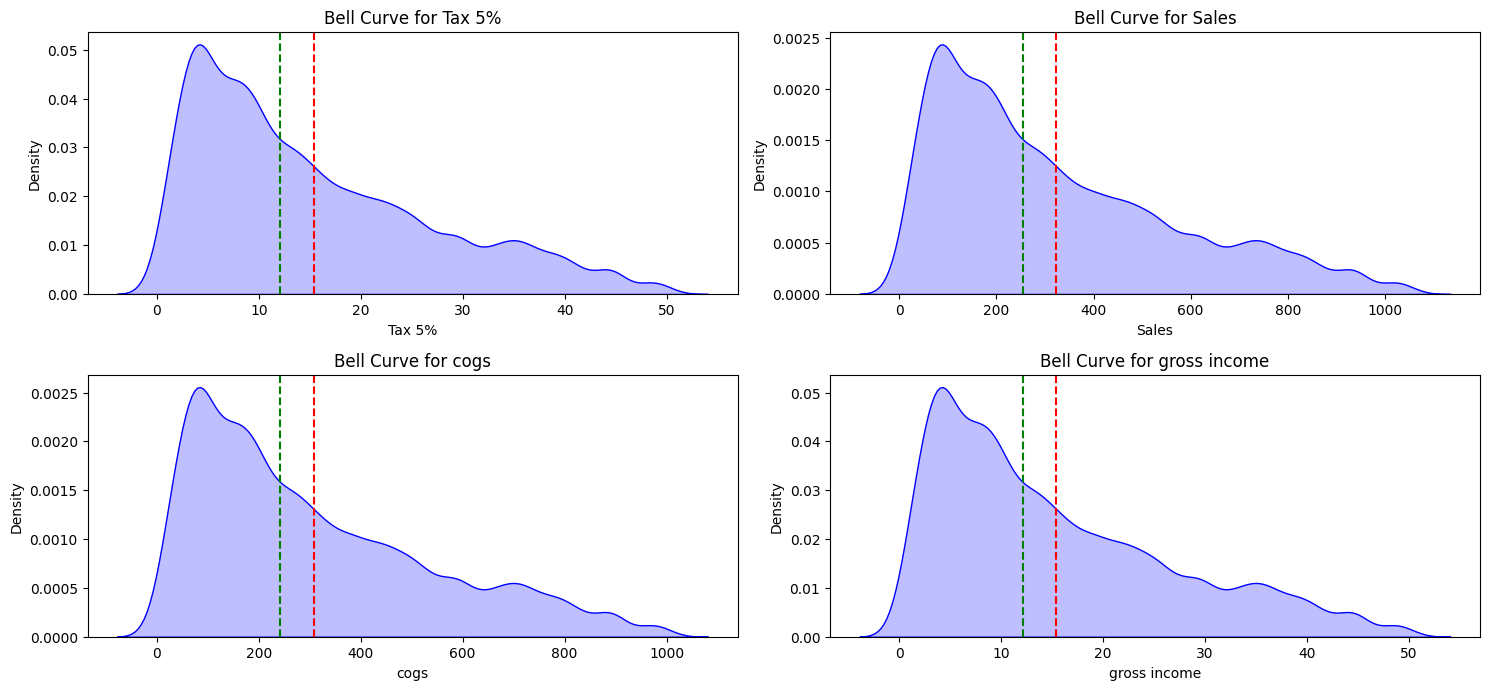

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, feature in enumerate(skewed_features.index):
    plt.subplot(3, 2, i + 1) 
    sns.kdeplot(data[feature], color='blue', fill=True, bw_adjust=0.5)
    plt.axvline(data[feature].mean(), color='red', linestyle='--')
    plt.axvline(data[feature].median(), color='green', linestyle='--')
    plt.title(f'Bell Curve for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [28]:
data_encoded = pd.get_dummies(data, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

data_encoded.head()

,Invoice ID,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross margin percentage,gross income,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,750-67-8428,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,522.83,4.761905,26.1415,...,True,False,False,False,False,True,False,False,False,True
1,226-31-3081,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,76.40,4.761905,3.8200,...,False,True,False,False,False,False,False,False,False,False
2,631-41-3108,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,324.31,4.761905,16.2155,...,True,True,False,False,False,False,True,False,True,False
3,123-19-1176,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,465.76,4.761905,23.2880,...,True,False,False,False,False,True,False,False,False,True
4,373-73-7910,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,604.17,4.761905,30.2085,...,True,False,False,False,False,False,False,True,False,True


In [29]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['Sales', 'Invoice ID', 'Date', 'Time'], axis=1)  # Drop target and irrelevant columns
y = data_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (800, 20), Test data shape: (200, 20)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R²: {r2:.2f}")

KNN - MSE: 7.46, R²: 1.00
SVM - MSE: 16349.33, R²: 0.75
Random Forest - MSE: 1.45, R²: 1.00
